In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [31]:
airlines=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
airlines.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [32]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [33]:
airlines.drop(["ID#"],axis=1,inplace=True)


In [34]:
airlines


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [35]:
airlines[airlines.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [36]:
airlines1=airlines.drop_duplicates()

In [37]:
airlines1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3998 non-null   int64
 1   Qual_miles         3998 non-null   int64
 2   cc1_miles          3998 non-null   int64
 3   cc2_miles          3998 non-null   int64
 4   cc3_miles          3998 non-null   int64
 5   Bonus_miles        3998 non-null   int64
 6   Bonus_trans        3998 non-null   int64
 7   Flight_miles_12mo  3998 non-null   int64
 8   Flight_trans_12    3998 non-null   int64
 9   Days_since_enroll  3998 non-null   int64
 10  Award?             3998 non-null   int64
dtypes: int64(11)
memory usage: 374.8 KB


In [42]:
#normalization of the data

def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [49]:
#selection all the columns and rows from the airlines_norm
airlines_norm=norm_func(airlines1.iloc[:,:])
airlines_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# agglomerative clustering 

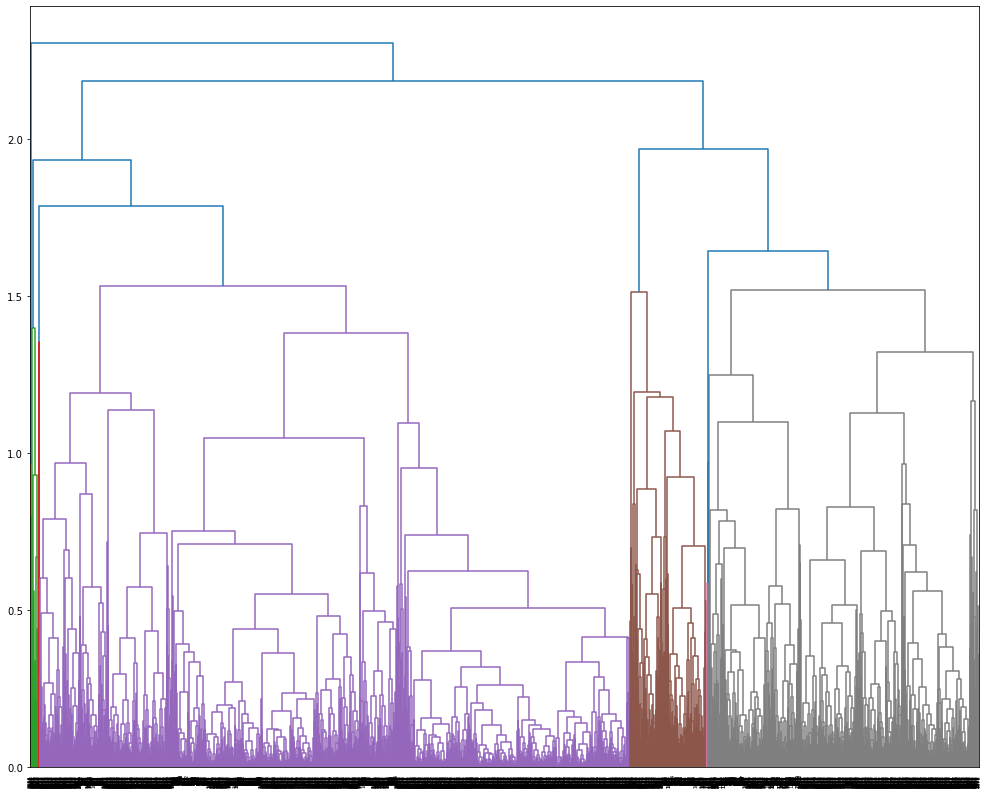

In [57]:
#creating dendogram for normalized data
plt.figure(figsize=(17,14))
dendrogram= sch.dendrogram(sch.linkage(airlines_norm, method='complete'))


In [58]:
#creating clusters 
hc=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [59]:
pred_hc=hc.fit_predict(airlines_norm)
pred_hc

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [60]:
#inserting clusters into original data set 
airlines1['aggl_clust']= pred_hc
airlines1

C:\Users\91840\AppData\Local\Temp/ipykernel_15828/131687997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airlines1['aggl_clust']= pred_hc


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,aggl_clust
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [62]:
#groupby by agglomerative clustering in which 6 clusters are considered
airlines1.iloc[:,:].groupby(airlines1.aggl_clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
aggl_clust,,,,,,,,,,,
0,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
1,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,59984.802410,88.587550,1.713253,1.000402,1.006024,10174.446988,9.098795,227.330924,0.653815,3825.617269,0.000000
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548
5,64521.000000,295.500000,1.250000,1.000000,4.250000,73273.750000,15.750000,575.000000,2.250000,4242.750000,0.500000


# k means clustering 

In [65]:
from sklearn.cluster import KMeans

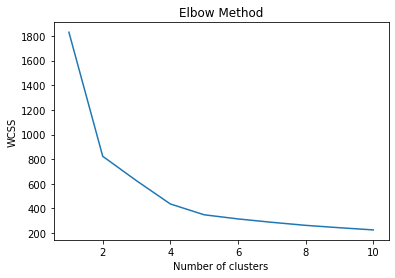

In [68]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(airlines_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [69]:
#from the above elbow curve we can select 4 clusters
model=KMeans(n_clusters=4)
model.fit(airlines_norm)

KMeans(n_clusters=4)

In [70]:
model.labels_

array([1, 1, 1, ..., 2, 1, 1])

In [71]:
labels=pd.Series(model.labels_)
airlines1['kmeans_clust']=labels
airlines1

C:\Users\91840\AppData\Local\Temp/ipykernel_15828/566708467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airlines1['kmeans_clust']=labels


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,aggl_clust,kmeans_clust
0,28143,0,1,1,1,174,1,0,0,7000,0,2,1.0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,1.0
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,1.0
3,14776,0,1,1,1,500,1,0,0,6952,0,2,1.0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0.0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,2.0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1.0
3997,54899,0,1,1,1,500,1,500,1,1401,0,2,1.0


In [72]:
airlines1.iloc[:,0:11].groupby(airlines1.kmeans_clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
kmeans_clust,,,,,,,,,,,
0.0,83560.881129,287.869242,1.160475,1.032689,1.008915,8843.659733,10.450223,1022.702823,3.132244,4338.890045,0.974740
1.0,41170.790084,94.479958,1.114979,1.017932,1.004219,3658.878692,6.647152,231.829641,0.666139,3620.287447,0.011076
2.0,108018.054523,195.837670,3.890954,1.001239,1.026022,45185.348203,20.089219,715.789343,2.147460,4867.275093,0.992565
3.0,117328.231884,73.112721,3.541063,1.001610,1.022544,30931.798712,16.985507,216.252818,0.626409,4436.545894,0.004831


# DB SCAN 

In [73]:
from sklearn.cluster import DBSCAN

In [74]:
airlines_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [75]:
dbscan=DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(airlines_norm)

DBSCAN(min_samples=10)

In [76]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [77]:
labels=pd.Series(dbscan.labels_)
airlines['dbclust']=labels
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbclust
0,28143,0,1,1,1,174,1,0,0,7000,0,0.0
1,19244,0,1,1,1,215,2,0,0,6968,0,0.0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0.0
3,14776,0,1,1,1,500,1,0,0,6952,0,0.0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1.0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1.0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0.0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0.0
